In [1]:
import pandas as pd
import numpy as np

In [2]:
df_sum = pd.read_csv(r'C:\Users\Anish Tondchirkar\Coding\Data Science and ML\PROJECTS\Olympics Analysis\Data\Athletes_summer_games.csv')
df_win = pd.read_csv(r'C:\Users\Anish Tondchirkar\Coding\Data Science and ML\PROJECTS\Olympics Analysis\Data\Athletes_winter_games.csv')
df_regions = pd.read_csv(r'C:\Users\Anish Tondchirkar\Coding\Data Science and ML\PROJECTS\Olympics Analysis\Data\regions.csv')

### Summer Olympics analysis begins here:

In [3]:
df_sum.head(3)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [4]:
df_win.head(3)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,6,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df_regions.head(3)

,Unnamed: 0,NOC,region,notes
0,0,EOR,Refugee,NaN
1,1,LBN,Lebanon,NaN
2,2,SGP,Singapore,NaN


In [6]:
df_sum = df_sum.merge(df_regions,on='NOC',how='left')
df_sum.head(3)

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Unnamed: 0_y,region,notes
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,45,China,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,45,China,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,59,Denmark,NaN


In [7]:
df_sum.columns

Index(['Unnamed: 0_x', 'Name', 'Sex', 'Age', 'Team', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Unnamed: 0_y', 'region',
       'notes'],
      dtype='object')

In [8]:
df_sum = df_sum.drop(columns='Unnamed: 0_y')

In [9]:
df_sum.head(3)

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [10]:
df_sum.shape

(237673, 15)

In [11]:
df_sum.isnull().sum()

Unnamed: 0_x         0
Name                 0
Sex                  0
Age               9189
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           201136
region              23
notes           233148
dtype: int64

In [12]:
df_sum.duplicated().sum()

0

In [13]:
df_sum['Medal'].value_counts()

Bronze    12276
Gold      12259
Silver    12002
Name: Medal, dtype: int64

In [14]:
# One hot encoding medal
df_sum = pd.concat([df_sum,pd.get_dummies(df_sum['Medal'])],axis=1)

In [15]:
# Grouping based on NOC for metal tally
df_sum.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()

#ofc this table is wrong coz it's counting all team members medal as unique

C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_20024\438441647.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()


,NOC,Gold,Silver,Bronze
0,USA,2585,1443,1272
1,URS,832,635,596
2,GBR,677,772,677
3,GER,613,564,683
4,ITA,540,491,491
...,...,...,...,...
228,AHO,0,1,0
229,LBN,0,0,0
230,LBR,0,0,0
231,LCA,0,0,0


In [16]:
df_sum[(df_sum['NOC'] == 'IND') & (df_sum['Medal'] == 'Gold')]

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,4732,Shaukat Ali,M,30.0,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,4736,Syed Mushtaq Ali,M,22.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,5032,Richard James Allen,M,25.0,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,5033,Richard James Allen,M,30.0,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,5034,Richard James Allen,M,34.0,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193964,236445,Carlyle Carrol Tapsell,M,23.0,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,236446,Carlyle Carrol Tapsell,M,27.0,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,250689,"Max ""Maxie"" Vaz",M,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
219336,266934,Sayed Muhammad Yusuf,M,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [17]:
medal_tally = df_sum.drop_duplicates(subset=['Team','NOC','Year','Games','City','Sport','Event','Medal'])

In [18]:
# Grouping based on NOC for metal tally
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()


C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_20024\1929390825.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()


In [19]:
medal_tally.head()

,region,Gold,Silver,Bronze
0,USA,1074,843,741
1,Russia,612,526,510
2,Germany,454,468,507
3,UK,300,338,322
4,China,267,197,175


In [20]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [21]:
# Metal tally data for all country
medal_tally.head()

,region,Gold,Silver,Bronze,Total
0,USA,1074,843,741,2658
1,Russia,612,526,510,1648
2,Germany,454,468,507,1429
3,UK,300,338,322,960
4,China,267,197,175,639


In [22]:
yr = df_sum["Year"].unique().tolist()

In [23]:
yr.sort()

In [24]:
yr.insert(0,"Overall")

In [25]:
yr

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016,
 2020]

In [26]:
country = df_sum["region"].dropna().unique().tolist()

In [27]:
country.sort()

In [28]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [29]:
len(country)

207

In [30]:
country.insert(0,"Overall")

In [31]:
medal_df = df_sum.drop_duplicates(subset=['Team','NOC','Year','Games','City','Sport','Event','Medal'])

In [32]:
# for specific country and all years
medal_df[medal_df["region"] == "India"]

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
436,505,S. Abdul Hamid,M,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
437,506,S. Abdul Hamid,M,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
790,895,Shiny Kurisingal Abraham-Wilson,F,19.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
791,896,Shiny Kurisingal Abraham-Wilson,F,19.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,0,0,0
792,897,Shiny Kurisingal Abraham-Wilson,F,23.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234840,12288,SINGH Shivpal,M,26.0,India,IND,2020 Summer,2020,Summer,Tokyo,Athletics,Men's Javelin Throw,NaN,India,NaN,0,0,0
235008,12456,SONAM Sonam,F,19.0,India,IND,2020 Summer,2020,Summer,Tokyo,Wrestling,Women's Freestyle 62kg,NaN,India,NaN,0,0,0
235105,12553,SREESHANKAR,M,22.0,India,IND,2020 Summer,2020,Summer,Tokyo,Athletics,Men's Long Jump,NaN,India,NaN,0,0,0
235869,13317,TOOR Tajinderpal Singh,M,26.0,India,IND,2020 Summer,2020,Summer,Tokyo,Athletics,Men's Shot Put,NaN,India,NaN,0,0,0


In [33]:
# for specific year and all country
medal_df[medal_df["Year"] == 2016]

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
34,80,Andreea Aanei,F,22.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN,0,0,0
77,139,Nstor Abad Sanjun,M,23.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN,0,0,0
78,140,Nstor Abad Sanjun,M,23.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN,0,0,0
79,141,Nstor Abad Sanjun,M,23.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN,0,0,0
80,142,Nstor Abad Sanjun,M,23.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222327,270763,Zaidatul Husniah Zulkifli,F,22.0,Malaysia,MAS,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Malaysia,NaN,0,0,0
222346,270782,Goretti Alejandra Zumaya Flores,F,19.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN,Mexico,NaN,0,0,0
222383,270839,Kelita Zupancic,F,26.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,Canada,NaN,0,0,0
222407,270903,Henrikas ustautas,M,22.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",NaN,Lithuania,NaN,0,0,0


In [34]:
# for specific year and country
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == "India")]

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,1185,Sharath Kamal Achanta,M,34.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
7065,8201,Seema Antil,F,33.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
8713,10177,Aditi Ashok,F,18.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
9202,10731,Manu Attri,M,23.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
10070,11772,Lalita Shivaji Babar,F,27.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,221771,Sathish Kumar Sivalingam,M,24.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,0,0,0
195568,238350,Shiva Thapa,M,22.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,0,0,0
198042,241309,Sandeep Tomar,M,25.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,0,0,0
216942,264077,Vikas Krishan Yadav,M,24.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0


In [35]:
# Function for year and country wise medal tally
def get_medal_tally(df_sum,yr,country):
    medal_df = df_sum.drop_duplicates(subset=['Team','NOC','Year','Games','City','Sport','Event','Medal'])
    ok = 0
    if yr == "Overall" and country == "Overall":
        temp_df = medal_df
    if yr == "Overall" and country != "Overall":
        ok = 1
        temp_df = medal_df[medal_df["region"] == country]
    if yr != "Overall" and country == "Overall":
        temp_df = medal_df[medal_df["Year"] == int(yr)]
    if yr != "Overall" and country != "Overall":
        temp_df = medal_df[(medal_df["Year"] == yr) & (medal_df["region"] == country)]

    if ok == 1:
        res = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=True).reset_index()
    else:
        res = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()
    res['Total'] = res['Gold'] + res['Silver'] + res['Bronze']

    print(res)

In [36]:
get_medal_tally(df_sum,"Overall","India")

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   2012     0       2       4      6
2   2004     0       1       0      1
3   2000     0       0       1      1
4   1996     0       0       1      1
5   1992     0       0       0      0
6   1988     0       0       0      0
7   1984     0       0       0      0
8   1976     0       0       0      0
9   2016     0       1       1      2
10  1968     0       0       1      1
11  1972     0       0       1      1
12  1960     0       1       0      1
13  1924     0       0       0      0
14  1920     0       0       0      0
15  1956     1       0       0      1
16  1980     1       0       0      1
17  1952     1       0       1      2
18  1948     1       0       0      1
19  1936     1       0       0      1
20  1932     1       0       0      1
21  1928     1       0       0      1
22  2008     1       0       2      3
23  1964     1       0       0      1
24  2020     1       2       4      7


C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_20024\1056713259.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=True).reset_index()


### !!!!!   Overall analysis begins    !!!!!
- Top stats(editions , host, athletes, nations, etc)
- Nation vs year
- Events vs year
- Atheletes vs year
- men & women participation graph
- most successfull athlete overall 
- dropdown for country and sports for most successfull athlete
- etc


In [37]:
# Editions
df_sum['Year'].unique().shape
# This says 30 editions of summer olympics but in reality there were 29 till 2020 so upon searching came to know 1906 isn't considered

(30,)

In [38]:
# Hosts
df_sum['City'].unique().shape

(23,)

In [39]:
# Sports
df_sum['Sport'].unique().shape

(70,)

In [40]:
# Events
df_sum['Event'].unique().shape

(957,)

In [41]:
# Athlete
df_sum['Name'].unique().shape

(127751,)

In [42]:
# Nations
df_sum['region'].unique().shape

(208,)

In [43]:
# Year vs Country begins x axis year y axis country participated
df_sum.head(2)

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [44]:
ok = df_sum.drop_duplicates(['Year','region'])
ok

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230530,7978,MAIBUCA Karalo Hepoiteloto,M,22.0,Tuvalu,TUV,2020 Summer,2020,Summer,Tokyo,Athletics,Men's 100m,NaN,NaN,Tuvalu,0,0,0
230607,8055,MALONE Chantel,F,29.0,British Virgin Islands,IVB,2020 Summer,2020,Summer,Tokyo,Athletics,Women's Long Jump,NaN,"Virgin Islands, British",NaN,0,0,0
230947,8395,MBOTTO Francky,M,23.0,Central African Republic,CAF,2020 Summer,2020,Summer,Tokyo,Athletics,Men's 800m,NaN,Central African Republic,NaN,0,0,0
231929,9377,NAUNG Ye Tun,M,38.0,Myanmar,MYA,2020 Summer,2020,Summer,Tokyo,Shooting,10m Air Pistol Men,NaN,Myanmar,NaN,0,0,0


In [45]:
ok = ok['Year'].value_counts().reset_index()
ok

,index,Year
0,2020,205
1,2016,205
2,2012,204
3,2008,203
4,2004,200
5,2000,199
6,1996,196
7,1992,168
8,1988,156
9,1984,139


In [46]:
ok.rename(columns={'index': 'Edition', 'Year': 'Countries'}, inplace=True)

In [47]:
nations_vs_time = ok.sort_values('Edition')
nations_vs_time

,Edition,Countries
29,1896,12
23,1900,31
28,1904,14
27,1906,20
26,1908,22
25,1912,29
24,1920,29
22,1924,45
21,1928,46
20,1932,47


In [48]:
nations_vs_time = nations_vs_time.drop(nations_vs_time[nations_vs_time['Edition'] == 1906].index)

In [49]:
nations_vs_time.head()

,Edition,Countries
29,1896,12
23,1900,31
28,1904,14
26,1908,22
25,1912,29


In [50]:
import plotly.express as pe
fig = pe.line(nations_vs_time, x="Edition", y="Countries", title='Participating Nations over Time')
fig.show()

In [51]:
spo = df_sum.drop_duplicates(['Year','Sport'])
spo.head()

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [52]:
spo = spo['Year'].value_counts().reset_index()
spo

,index,Year
0,2020,46
1,2004,34
2,2016,34
3,2008,34
4,2000,34
5,2012,32
6,1996,31
7,1992,29
8,1988,27
9,1984,25


In [53]:
spo.rename(columns={'index': 'Edition', 'Year': 'Sport'}, inplace=True)

In [54]:
sports_vs_time = spo.sort_values('Edition')

In [55]:
sports_vs_time = sports_vs_time.drop(sports_vs_time[sports_vs_time['Edition'] == 1906].index)

In [56]:
fig2 = pe.line(sports_vs_time, x="Edition", y="Sport", title='No of Sports over Time')
fig2.show()

In [57]:
sports_vs_time

,Edition,Sport
29,1896,9
19,1900,20
25,1904,18
11,1908,24
27,1912,17
10,1920,25
20,1924,20
26,1928,17
24,1932,18
12,1936,24


In [58]:
eve = df_sum.drop_duplicates(['Year','Event'])
eve

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225146,2594,CONYEDO RUANO Abraham de Jesus,M,27.0,Italy,ITA,2020 Summer,2020,Summer,Tokyo,Wrestling,Men's Freestyle 97kg,Bronze,Italy,NaN,1,0,0
225629,3077,DEMIRHAN Evin,F,26.0,Turkey,TUR,2020 Summer,2020,Summer,Tokyo,Wrestling,Women's Freestyle 50kg,NaN,Turkey,NaN,0,0,0
225654,3102,DERKACH Dariya,F,28.0,Italy,ITA,2020 Summer,2020,Summer,Tokyo,Athletics,Women's Triple Jump,NaN,Italy,NaN,0,0,0
226316,3764,FARINHA Jonathan,M,25.0,Trinidad and Tobago,TTO,2020 Summer,2020,Summer,Tokyo,Athletics,Men's 4 x 100m Relay,NaN,Trinidad,Trinidad and Tobago,0,0,0


In [59]:
eve = eve['Year'].value_counts().reset_index()
eve

,index,Year
0,2020,306
1,2016,306
2,2012,302
3,2008,302
4,2004,301
5,2000,300
6,1996,271
7,1992,257
8,1988,237
9,1984,221


In [60]:
eve.rename(columns={'index': 'Edition', 'Year': 'Event'}, inplace=True)
eve.head(2)

,Edition,Event
0,2020,306
1,2016,306


In [61]:
eve_vs_time = eve.sort_values('Edition')
eve_vs_time.head(2)

,Edition,Event
29,1896,43
27,1900,90


In [62]:
eve_vs_time = eve_vs_time.drop(eve_vs_time[eve_vs_time['Edition'] == 1906].index)

In [63]:
fig3 = pe.line(eve_vs_time, x="Edition", y="Event", title='No of Events over Time')
fig3.show()

In [64]:
athlete = df_sum.drop_duplicates(['Year','Name'])
athlete

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237667,15115,ZWICKER Martin Detlef,M,34.0,Germany,GER,2020 Summer,2020,Summer,Tokyo,Hockey,Men Team,NaN,Germany,NaN,0,0,0
237668,15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN,Poland,NaN,0,0,0
237669,15117,ZYKOVA Yulia,F,25.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver,Russia,NaN,0,0,1
237670,15118,ZYUZINA Ekaterina,F,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Sailing,Women's One Person Dinghy - Laser Radial,NaN,Russia,NaN,0,0,0


In [65]:
athlete = athlete['Year'].value_counts().reset_index()
athlete.head(3)

,index,Year
0,2020,11629
1,2016,11174
2,2008,10880


In [66]:
athlete.rename(columns={'index':'Edition','Year':'Athlete'},inplace='True')
athlete

,Edition,Athlete
0,2020,11629
1,2016,11174
2,2008,10880
3,2000,10639
4,2004,10537
5,2012,10502
6,1996,10324
7,1992,9380
8,1988,8443
9,1972,7105


In [67]:
ath_vs_time = athlete.sort_values('Edition')
ath_vs_time.head(2)

,Edition,Athlete
29,1896,176
26,1900,1220


In [68]:
ath_vs_time = ath_vs_time.drop(ath_vs_time[ath_vs_time['Edition'] == 1906].index)

In [69]:
fig4 = pe.line(ath_vs_time, x="Edition", y="Athlete", title='No of Athlete over Time')
fig4.show()

In [70]:
df_sum.columns

Index(['Unnamed: 0_x', 'Name', 'Sex', 'Age', 'Team', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [71]:
athlete_mf = df_sum.drop_duplicates(['Name','region'])
athlete_mf

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237667,15115,ZWICKER Martin Detlef,M,34.0,Germany,GER,2020 Summer,2020,Summer,Tokyo,Hockey,Men Team,NaN,Germany,NaN,0,0,0
237668,15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN,Poland,NaN,0,0,0
237669,15117,ZYKOVA Yulia,F,25.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver,Russia,NaN,0,0,1
237670,15118,ZYUZINA Ekaterina,F,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Sailing,Women's One Person Dinghy - Laser Radial,NaN,Russia,NaN,0,0,0


In [72]:
# Men and women over years
men = athlete_mf[athlete_mf['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
men.head(10)

,Year,Name
0,1896,174
1,1900,1181
2,1904,629
3,1906,759
4,1908,1772
5,1912,1978
6,1920,2280
7,1924,2535
8,1928,2342
9,1932,1382


In [73]:
# Men and women over years
women = athlete_mf[athlete_mf['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
women.head(10)

,Year,Name
0,1900,23
1,1904,6
2,1906,6
3,1908,44
4,1912,53
5,1920,73
6,1924,132
7,1928,285
8,1932,162
9,1936,316


In [74]:
men_and_women = men.merge(women,on='Year',how='left')
men_and_women.rename(columns={'Name_x':'Men','Name_y':'Women'},inplace=True)

In [75]:
men_and_women.fillna(0,inplace=True)
men_and_women

,Year,Men,Women
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [76]:
lin2 = pe.line(men_and_women,x='Year',y=['Men','Women'])
lin2.show() 

In [77]:
# Successfull athletes
def most_succ(df,sport):
    tmp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        tmp_df = tmp_df[tmp_df['Sport'] == sport]
    ok = tmp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    ok.rename(columns={'index':'Name','Name_x':'Medal Count','region':'Country'},inplace=True)
    return ok

In [78]:
most_succ(df_sum,'Athletics')

,Name,Medal Count,Sport,Country
0,Paavo Johannes Nurmi,12,Athletics,Finland
12,"Frederick Carlton ""Carl"" Lewis",10,Athletics,USA
22,"Raymond Clarence ""Ray"" Ewry",10,Athletics,USA
32,Martin Joseph Sheridan,9,Athletics,USA
47,Merlene Joyce Ottey-Page,9,Athletics,Jamaica
66,Allyson Michelle Felix,9,Athletics,USA
76,Veronica Angella Campbell-Brown,8,Athletics,Jamaica
87,"Viljo Eino ""Ville"" Ritola (Koukkari-)",8,Athletics,Finland
96,Usain St. Leo Bolt,8,Athletics,Jamaica
106,Shirley Barbara Strickland de la Hunty,7,Athletics,Australia


### Countrywise analysis:
- dropdown for country and then below all
- Countrywise medal tally vs year
- heatmap idk rn maybe country performance in diff sports
- Successfull athlete 

In [79]:
tmp = df_sum.dropna(subset='Medal')

In [80]:
tmp.drop_duplicates(subset=['Team','NOC','Year','Games','City','Sport','Event','Medal'],inplace=True)

C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_20024\2614871602.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
tmp

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,37,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,38,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,41,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,42,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237618,15066,ZHUMANAZAROVA Meerim,F,21.0,Kyrgyzstan,KGZ,2020 Summer,2020,Summer,Tokyo,Wrestling,Women's Freestyle 68kg,Bronze,Kyrgyzstan,NaN,1,0,0
237643,15091,ZOLOTIC Anastasija,F,18.0,United States,USA,2020 Summer,2020,Summer,Tokyo,Taekwondo,Women -57kg,Gold,USA,NaN,0,1,0
237652,15100,ZOU Jingyuan,M,23.0,China,CHN,2020 Summer,2020,Summer,Tokyo,Artistic Gymnastics,Men's Parallel Bars,Gold,China,NaN,0,1,0
237664,15112,ZVEREV Alexander,M,24.0,Germany,GER,2020 Summer,2020,Summer,Tokyo,Tennis,Men's Singles,Gold,Germany,NaN,0,1,0


In [82]:
new_tmp = tmp[tmp['region'] == 'Pakistan']
new_tmp = new_tmp.groupby('Year').count()['Medal'].reset_index()

In [83]:
new_tmp

,Year,Medal
0,1956,1
1,1960,2
2,1964,1
3,1968,1
4,1972,1
5,1976,1
6,1984,1
7,1988,1
8,1992,1


In [84]:
fig6 = pe.line(new_tmp, x="Year", y="Medal", title='Country vs Medals')
fig6.show()

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

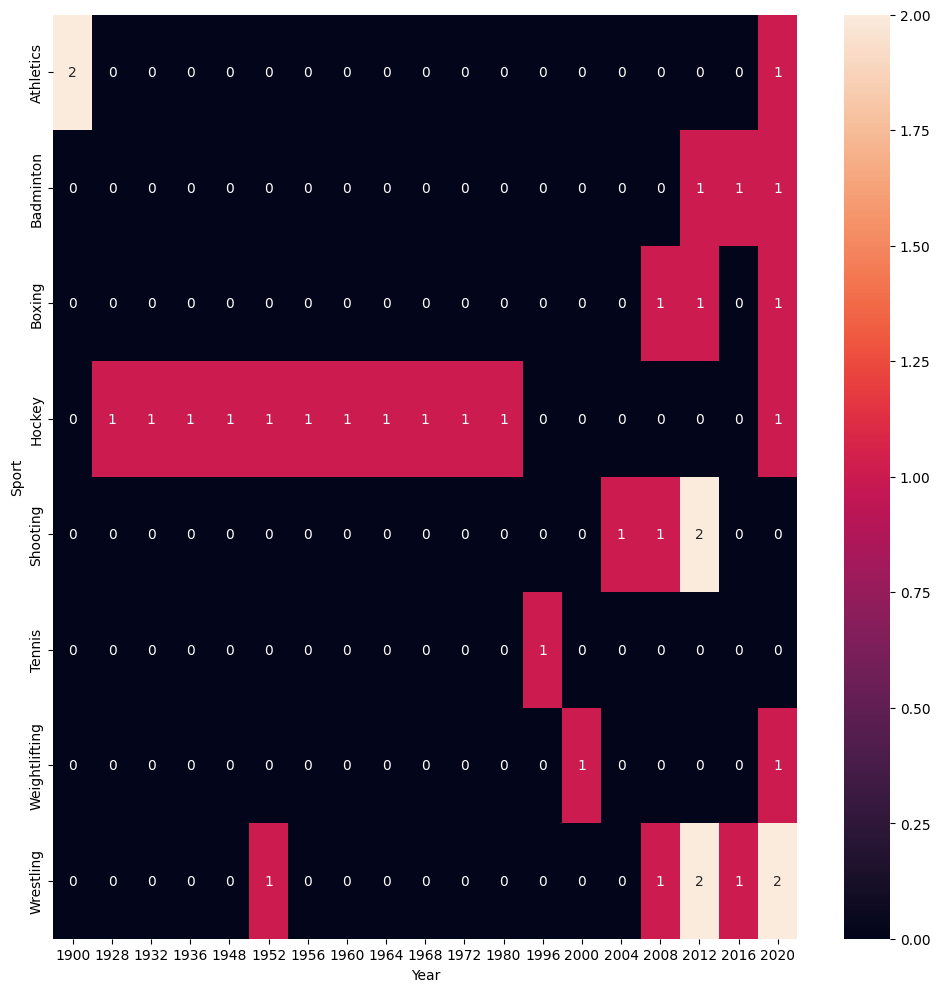

In [86]:
new_tmp = tmp[tmp['region'] == 'India']
plt.figure(figsize=(12,12))
sns.heatmap(new_tmp.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [87]:
# Successfull athletes
def most_succ_ath(df,country):
    tmp_df = df.dropna(subset=['Medal'])
    tmp_df = tmp_df[tmp_df['region'] == country]
    ok = tmp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    ok.rename(columns={'index':'Name','Name_x':'Medal Count','region':'Country'},inplace=True)
    return ok

In [88]:
most_succ_ath(df_sum,'Japan')

,Name,Medal Count,Sport
0,Takashi Ono,13,Gymnastics
33,Sawao Kato,12,Gymnastics
57,Akinori Nakayama,10,Gymnastics
73,Mitsuo Tsukahara,9,Gymnastics
97,Eizo Kenmotsu,9,Gymnastics
121,Kosuke Kitajima,7,Swimming
132,Yukio Endo,7,Gymnastics
156,Masao Takemoto,7,Gymnastics
180,Kohei Uchimura,7,Gymnastics
201,Shuji Tsurumi,6,Gymnastics


### Winter Olmpics

In [89]:
df_sum.head(2)

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [90]:
df_win.head(2)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [91]:
df_win = df_win.merge(df_regions,on='NOC',how='left')
df_win.head(3)

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Unnamed: 0_y,region,notes
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,149,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,149,Netherlands,NaN
2,6,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,149,Netherlands,NaN


In [92]:
df_win = df_win.drop(columns='Unnamed: 0_y')

In [93]:
df_win.shape

(48564, 15)

In [94]:
df_win.isnull().sum()

Unnamed: 0_x        0
Name                0
Sex                 0
Age               285
Team                0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal           42869
region              0
notes           47926
dtype: int64

In [95]:
df_win.duplicated().sum()

0

In [96]:
df_win['Medal'].value_counts()
df_win

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
2,6,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
3,7,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
4,8,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48559,271111,Andrzej ya,M,29.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
48560,271112,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
48561,271113,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
48562,271114,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [97]:
# One hot encoding medal
df_win = pd.concat([df_win,pd.get_dummies(df_win['Medal'])],axis=1)
df_win.head(1)

,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


In [98]:
# Grouping based on NOC for metal tally
df_win.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()
df_win.head(5)

C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_20024\1226408709.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Unnamed: 0_x,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0
2,6,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
3,7,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,0,0,0
4,8,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


In [99]:
medal_tally_win = df_win.drop_duplicates(subset=['Team','NOC','Year','Games','City','Sport','Event','Medal'])

In [101]:
# Grouping based on NOC for metal tally
medal_tally_win = medal_tally_win.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values(by='Gold',ascending=False).reset_index()
medal_tally_win.head

,region,Gold,Silver,Bronze
0,Germany,136,135,106
1,Russia,135,102,102
2,Norway,111,108,100
3,USA,96,99,84
4,Canada,62,56,52


In [113]:
a = medal_tally_win['Gold'][0] + medal_tally_win['Silver'][0]
a

C:\Users\Anish Tondchirkar\AppData\Local\Temp\ipykernel_20024\3730765522.py:1: RuntimeWarning:

overflow encountered in ubyte_scalars



15

In [114]:
print(medal_tally_win.dtypes)

region    object
Gold       uint8
Silver     uint8
Bronze     uint8
Total      uint8
dtype: object


In [116]:
medal_tally_win['Gold'] = medal_tally_win['Gold'].astype('uint64')
medal_tally_win['Silver'] = medal_tally_win['Silver'].astype('uint64')
medal_tally_win['Bronze'] = medal_tally_win['Bronze'].astype('uint64')

In [117]:
medal_tally_win['Total'] = medal_tally_win['Gold'] + medal_tally_win['Silver'] + medal_tally_win['Bronze']
medal_tally_win.head(5)

,region,Gold,Silver,Bronze,Total
0,Germany,136,135,106,377
1,Russia,135,102,102,339
2,Norway,111,108,100,319
3,USA,96,99,84,279
4,Canada,62,56,52,170
